# Improting Libraries

# Mall Customer Segmentation Engine

In [58]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#for analysis
import dabl

In [59]:
data =pd.read_csv('Mall_Customers.csv')

# Examine the data

In [60]:
data.shape

(200, 5)

In [61]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [62]:
data.sample(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
166,167,Male,42,86,20
178,179,Male,59,93,14
177,178,Male,27,88,69


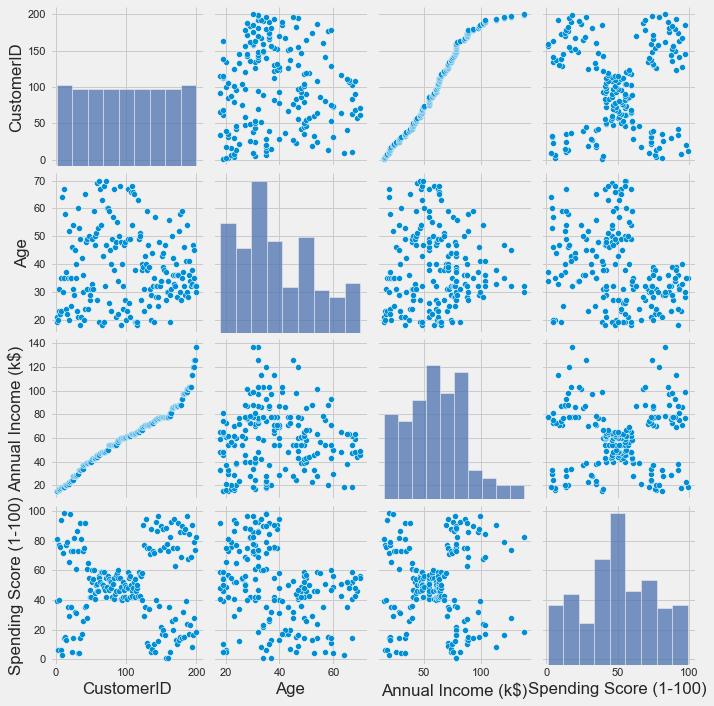

In [63]:
#pairplot of data
sns.pairplot(data)
plt.show()

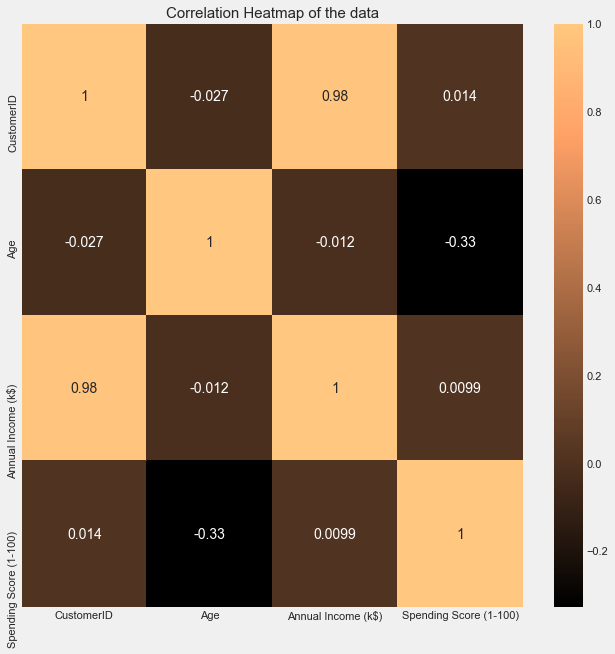

In [64]:
#correlation heap map of data
sns.heatmap(data.corr(), annot =True, cmap='copper')
plt.title('Correlation Heatmap of the data', fontsize=15)
plt.show()

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=4.74E-02'}, xlabel='Spending Score (1...', ylabel='Genre'>]],
       dtype=object)]

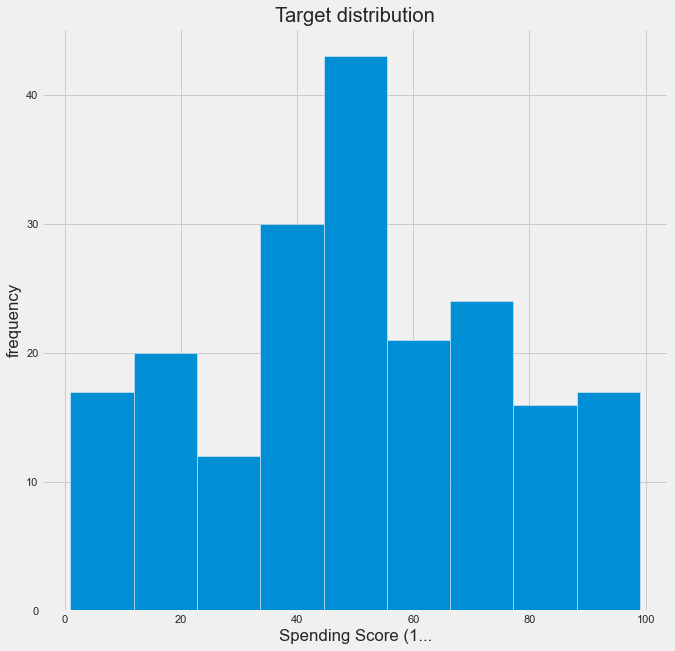

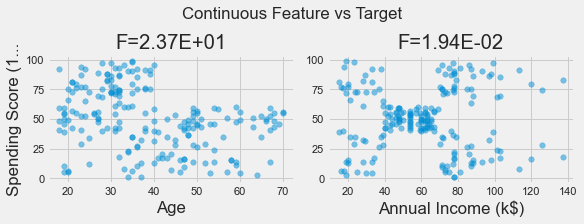

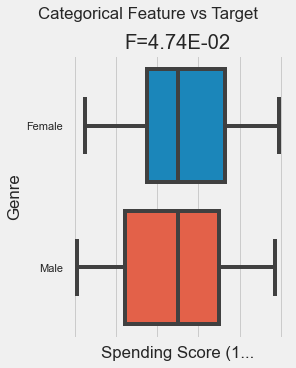

In [65]:
#anayyze the data respect ti spending score
dabl.plot(data, target_col ='Spending Score (1-100)')

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=3.04E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Spending Score (1...'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=7.92E-03'}, xlabel='Annual Income (k$)', ylabel='Genre'>]],
       dtype=object)]

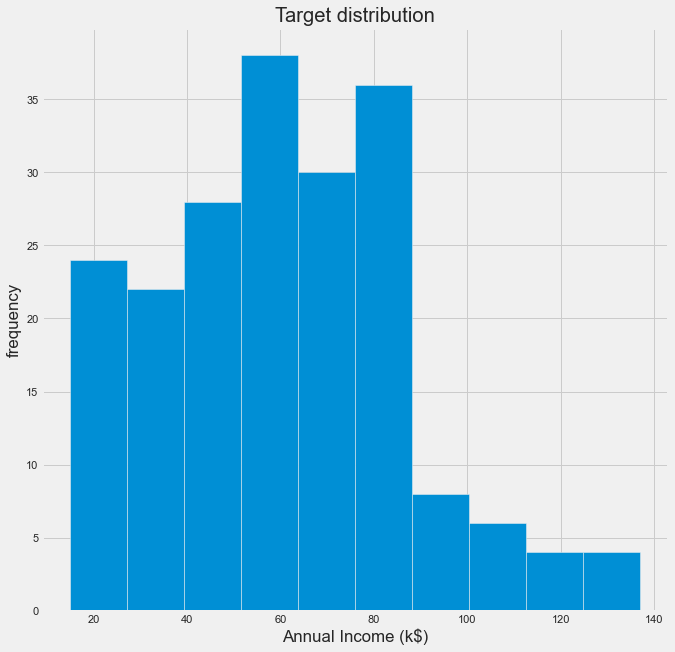

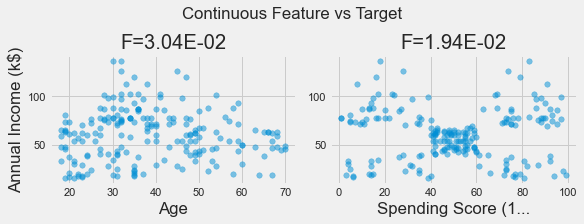

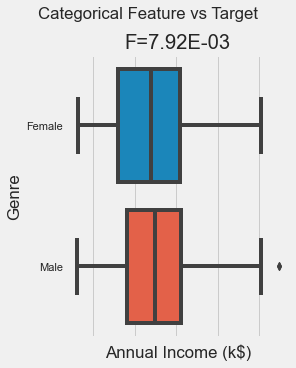

In [66]:
#anayyze the data respect to annual income
dabl.plot(data, target_col ='Annual Income (k$)')

# Descriptive statistics

In [67]:
#Describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [68]:
#Describing the categorical data
data.describe(include ="object")

,Genre
count,200
unique,2
top,Female
freq,112


In [69]:
#check null values
data.isnull().any().any()

False

# Data Visualization

Text(0, 0.5, 'Count')

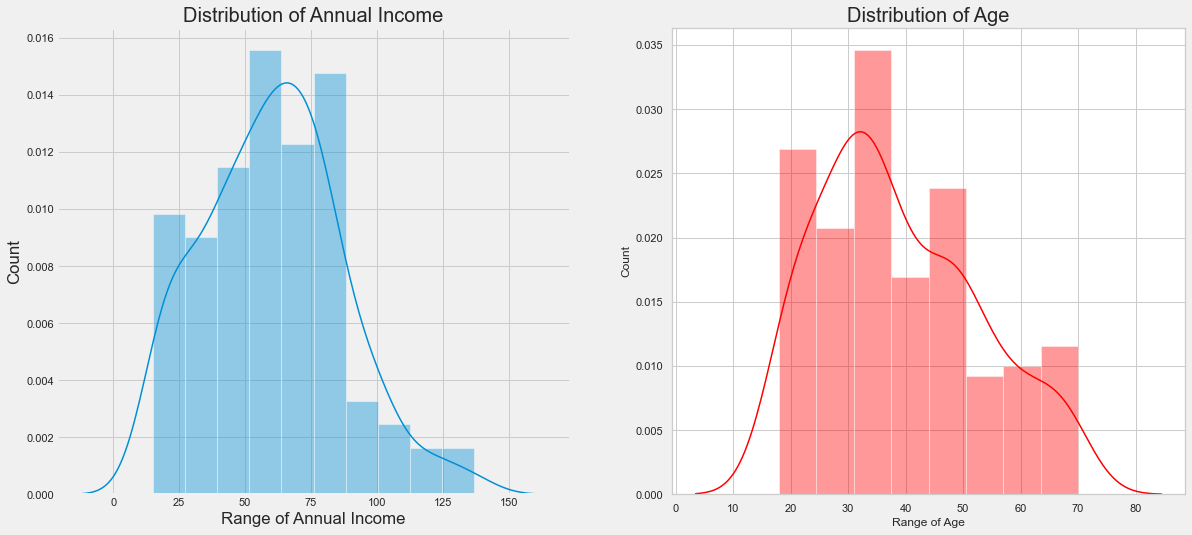

In [70]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] =(18,8)

plt.subplot(1,2,1)
sns.set(style ='whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.set(style ='whitegrid')
sns.distplot(data['Age'], color ='red')
plt.title('Distribution of Age', fontsize=20)
plt.xlabel('Range of Age')
plt.ylabel('Count')



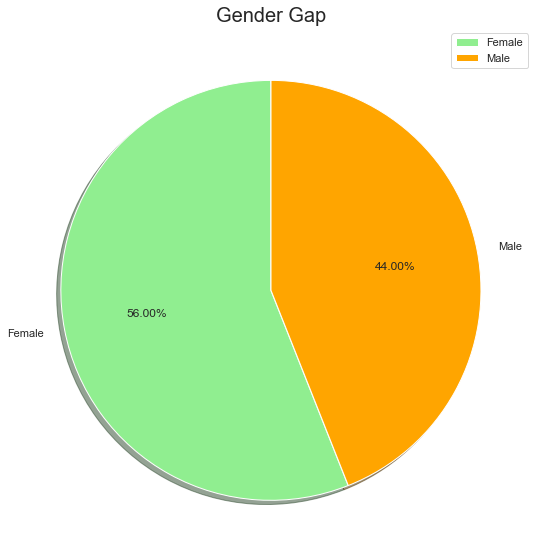

In [71]:
labels =['Female','Male']
size =data['Genre'].value_counts()
colors =['lightgreen','orange']
explode =[0,0.001]

plt.rcParams['figure.figsize'] =(9,9)
plt.pie(size, colors= colors, explode=explode, labels=labels, shadow=True, startangle =90, autopct ='%.2f%%')
plt.title('Gender Gap', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

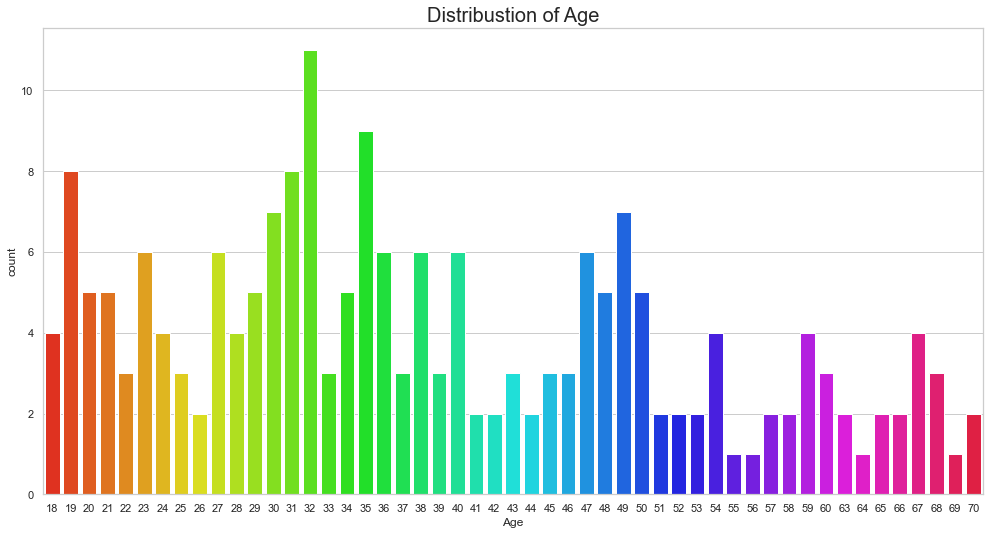

In [72]:
plt.rcParams['figure.figsize'] =(15,8)
sns.countplot(data['Age'], palette ='hsv')
plt.title('Distribustion of Age', fontsize=20)
plt.show()

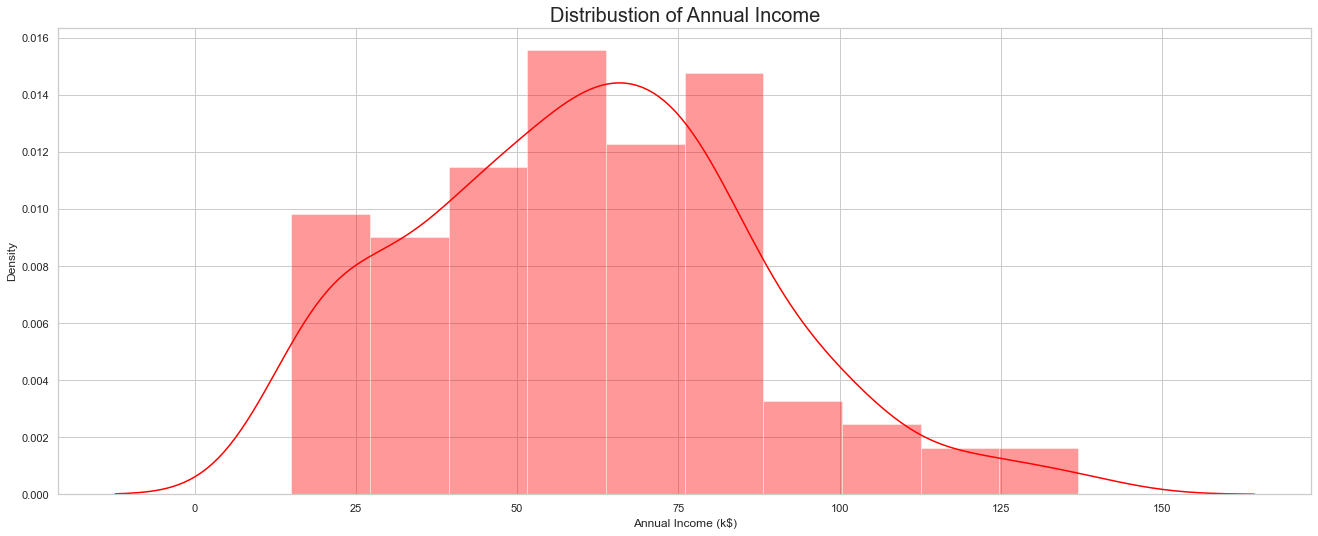

In [73]:
#Distribustion of annoual income
plt.rcParams['figure.figsize'] =(20,8)
sns.distplot(data['Annual Income (k$)'], color ='red')
plt.title('Distribustion of Annual Income', fontsize=20)
plt.show()

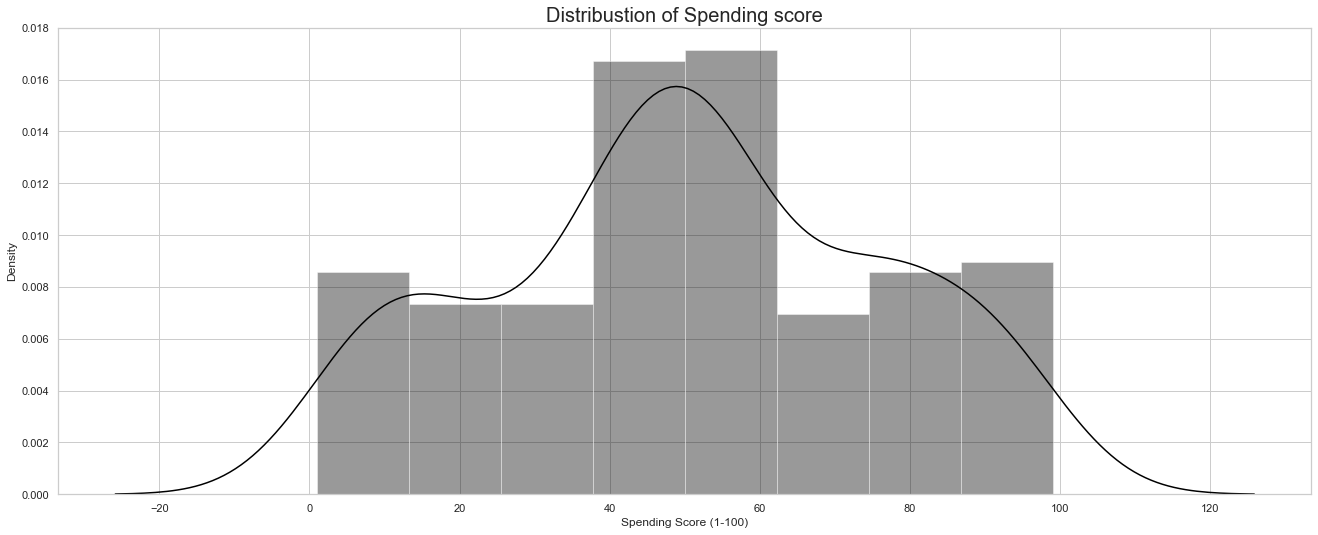

In [74]:
#Distribustion of Spending score
plt.rcParams['figure.figsize'] =(20,8)
sns.distplot(data['Spending Score (1-100)'], color ='black')
plt.title('Distribustion of Spending score', fontsize=20)
plt.show()

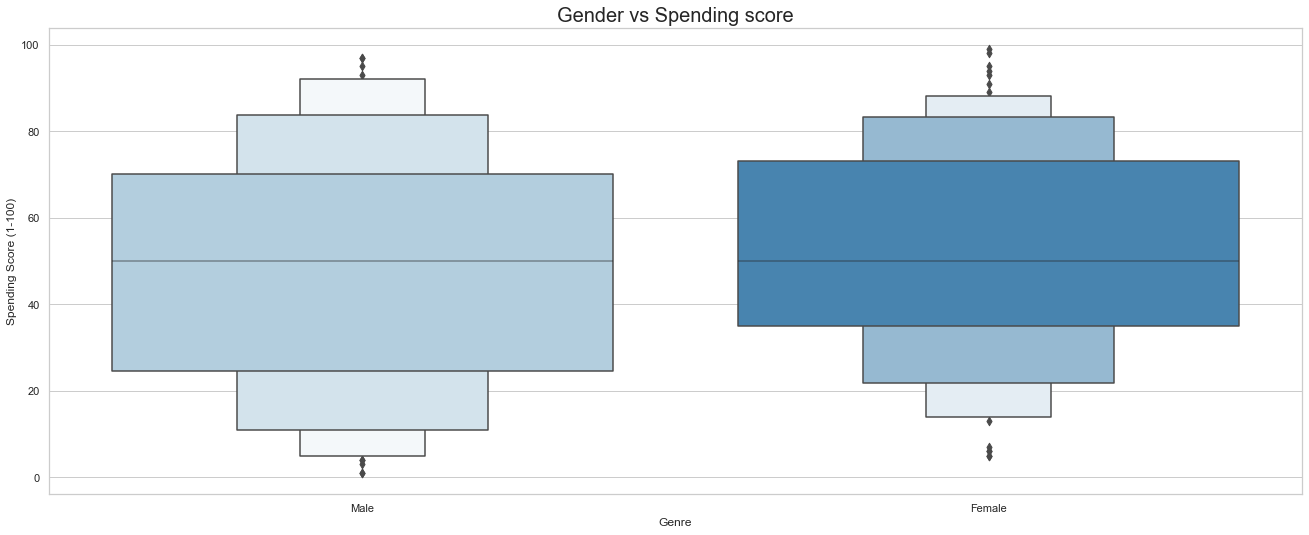

In [75]:
#Distribustion of gender Spending score
plt.rcParams['figure.figsize'] =(20,8)
sns.boxenplot(data['Genre'], data['Spending Score (1-100)'], palette ='Blues')
plt.title('Gender vs Spending score', fontsize=20)
plt.show()

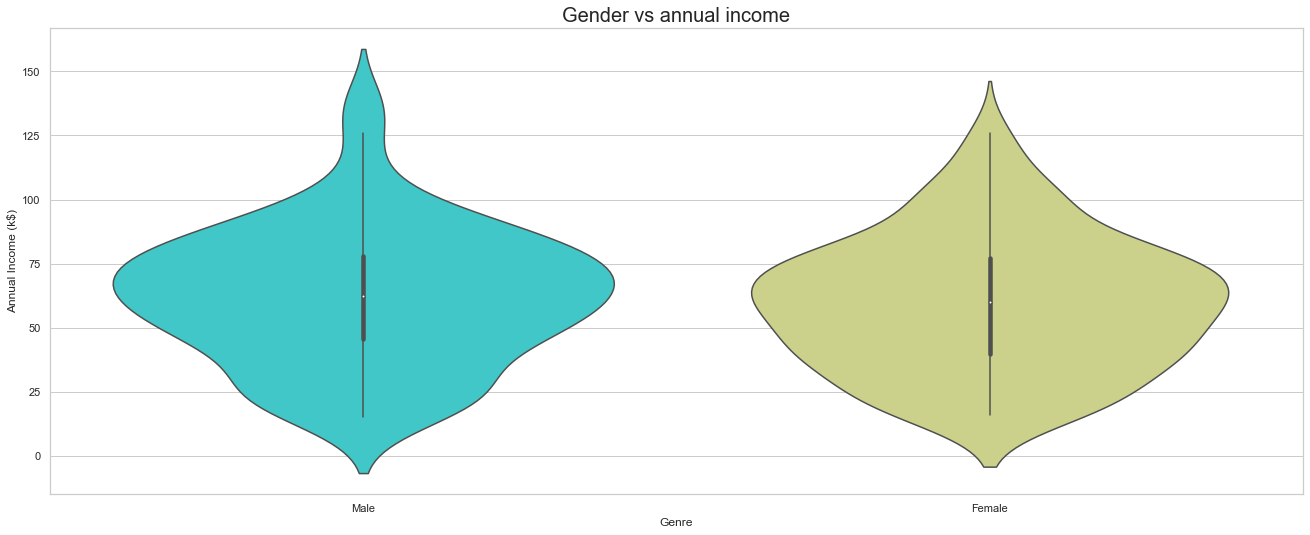

In [76]:
#Distribustion of gender annaual
plt.rcParams['figure.figsize'] =(20,8)
sns.violinplot(data['Genre'], data['Annual Income (k$)'], palette ='rainbow')
plt.title('Gender vs annual income', fontsize=20)
plt.show()

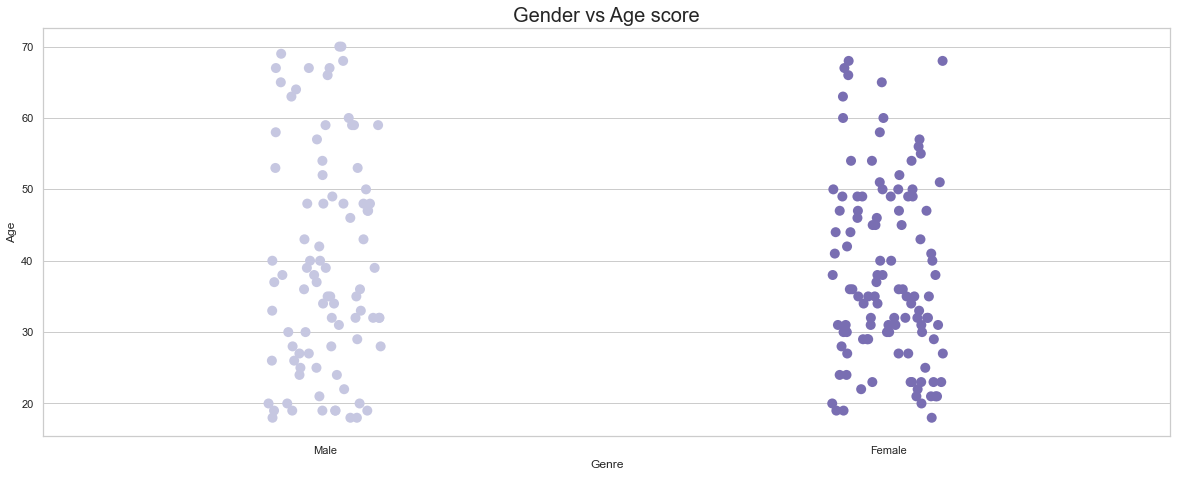

In [77]:
#Distribustion of gender and age
plt.rcParams['figure.figsize'] =(18,7)
sns.stripplot(data['Genre'], data['Age'], palette ='Purples', size=10)
plt.title('Gender vs Age score', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Annual Income vs  Age Spending score')

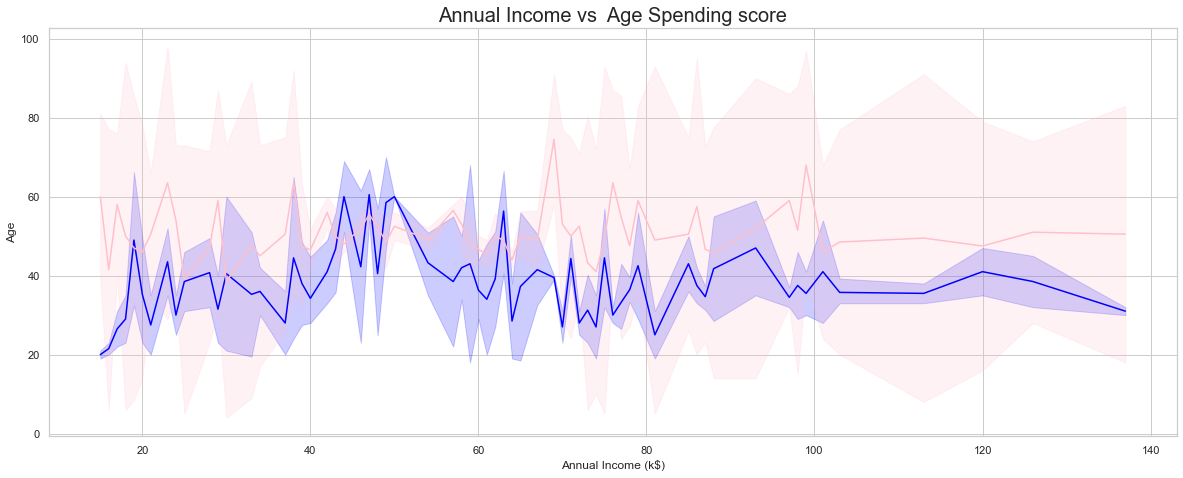

In [78]:
#annaul income vs age and spending score

x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color ='blue')
sns.lineplot(x, z, color ='pink')
plt.title('Annual Income vs  Age Spending score', fontsize=20)


# Clusting Anaylsis

In [79]:
import warnings
warnings.filterwarnings('ignore')

x =data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

print(x.shape)

(200, 2)


In [80]:
x_data =pd.DataFrame(x)
x_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


# Kmeans Algorithm

In [81]:
#The elbow Method to find the no. of Optimal clusters

In [82]:
from sklearn.cluster import KMeans

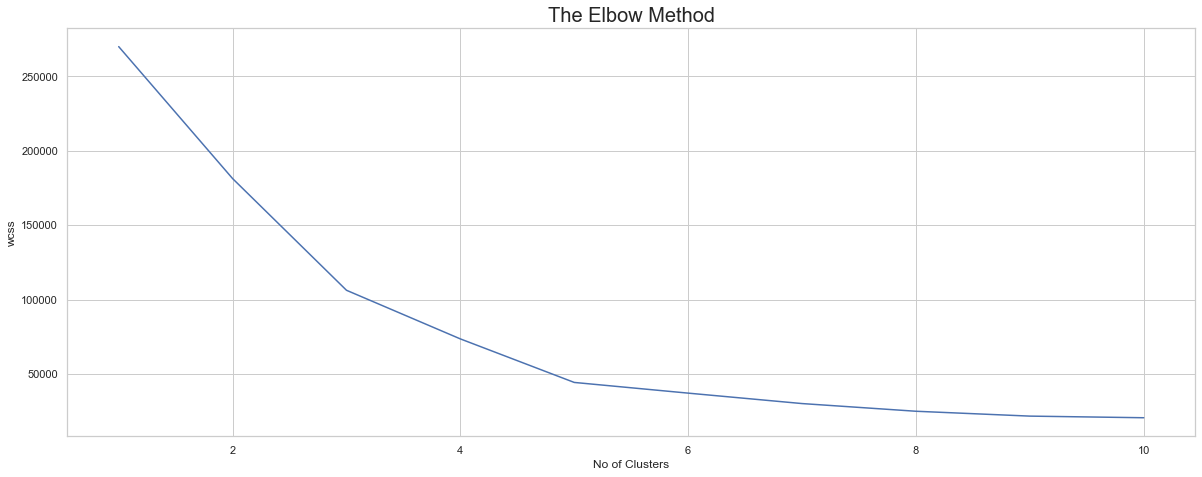

In [83]:
wcss =[]
for i in range(1, 11):
    km =KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
    km.fit(x)
    wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize =20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()
    
    

# Visualize the cluster

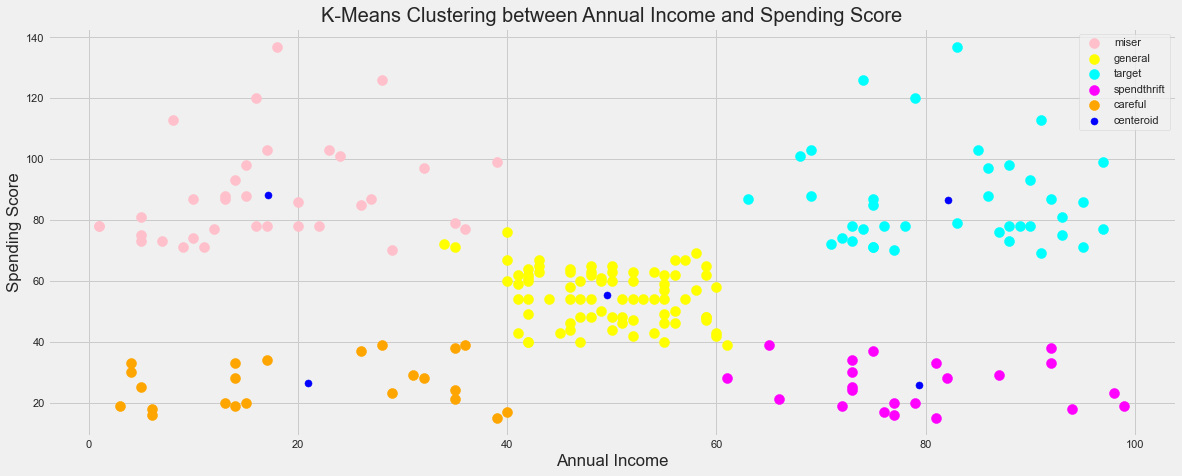

In [84]:
plt.style.use('fivethirtyeight')
km =KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
y_means =km.fit_predict(x)


plt.scatter(x[y_means ==0, 0], x[y_means==0, 1], s =100, c= 'pink', label='miser')
plt.scatter(x[y_means ==1, 0], x[y_means==1, 1], s =100, c= 'yellow', label='general')
plt.scatter(x[y_means ==2, 0], x[y_means==2, 1], s =100, c= 'cyan', label='target')
plt.scatter(x[y_means ==3, 0], x[y_means==3, 1], s =100, c= 'magenta', label='spendthrift')
plt.scatter(x[y_means ==4, 0], x[y_means==4, 1], s =100, c= 'orange', label='careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s =50, c= 'blue', label='centeroid')

plt.style.use('fivethirtyeight')
plt.title('K-Means Clustering between Annual Income and Spending Score', fontsize =20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

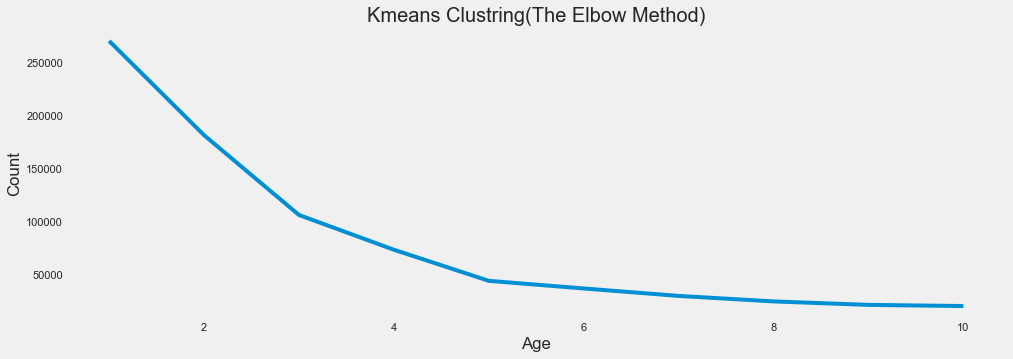

In [85]:
#cluster between age and spending score

wcss =[]
for i in range(1, 11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] =(15,5)
plt.plot(range(1, 11), wcss)
plt.title('Kmeans Clustring(The Elbow Method)', fontsize =20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

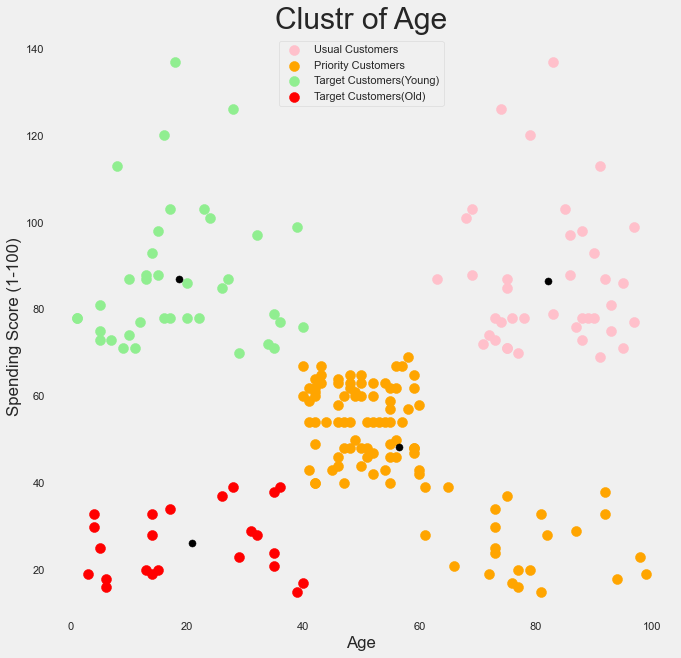

In [86]:
kmeans =KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init =10, random_state =0)
y_means =kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] =(10,10)
plt.title('Clustr of Age', fontsize =30)

plt.scatter(x[y_means ==0, 0], x[y_means==0, 1], s =100, c= 'pink', label='Usual Customers')
plt.scatter(x[y_means ==1, 0], x[y_means==1, 1], s =100, c= 'orange', label='Priority Customers')
plt.scatter(x[y_means ==2, 0], x[y_means==2, 1], s =100, c= 'lightgreen', label='Target Customers(Young)')
plt.scatter(x[y_means ==3, 0], x[y_means==3, 1], s =100, c= 'red', label='Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =50, c= 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()